# The Math I Need for Transformers — Notebook

This notebook accompanies the Medium article *"The Math I Need for Transformers"*. It contains runnable, minimal examples that illustrate the key concepts: **dot product**, **softmax**, **cross-entropy loss**

**How to use:** run cells from top to bottom. The code uses only `numpy` and `matplotlib` so it should run in any standard Python environment with those packages installed.

---

In [33]:
# Uncomment this to install
# ! pip install pandas numpy matplotlib  

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### 1 — Dot Product

The dot product measures similarity between two vectors. If `a` and `b` are vectors, their dot product is $a\cdot b = \sum_i a_i b_i$.

We'll show a numeric example and explain why it's useful as a similarity score in attention (queries × keys).

Let's consider an example:

“Where does the dog sleep at night?”

The mechanism highlights the most relevant connections — focusing attention on “dog,” “sleep,” and “night.”

In [27]:
# Suppose the model is focusing on the word "sleep" (the current token)
# Word vectors (illustrative, not real embeddings)
q_sleep = np.array([1.0, 2.0, 3.0])   # Query for "sleep"
k_dog = np.array([1.0, 0.0, 0.0])     # Key for "dog"
k_night = np.array([0.5, 2.0, 1.0])   # Key for "night"
k_where = np.array([0.2, 0.1, 0.0])   # Key for "where" (less related)

# Step 1: Compute attention scores (dot products)
dot_dog = q_sleep.dot(k_dog)
dot_night = q_sleep.dot(k_night)
dot_where = q_sleep.dot(k_where)

print("Dot product scores (similarities):")
print(f"where: {dot_where:.2f}, dog: {dot_dog:.2f}, night: {dot_night:.2f}")

Dot product scores (similarities):
where: 0.40, dog: 1.00, night: 7.50


### 2 — Softmax

Softmax converts scores (logits) into a probability distribution that sums to 1: $$\text{softmax}(z)_i = \dfrac{e^{z_i}}{\sum_j e^{z_j}}.$$ 

We compute softmax on the dot-product scores above and visualize the distribution.

In [24]:
def softmax(z):
    z = np.array(z)
    z = z - np.max(z)  # for numerical stability
    expz = np.exp(z)
    return expz / np.sum(expz)

In [28]:
# Step 2: Combine scores into a single array
scores = np.array([dot_where, dot_dog, dot_night])

# Step 3: Apply softmax to get attention probabilities
probs = softmax(scores)

print("\nAttention probabilities (after softmax):")
print(f"where: {probs[0]:.3f}, dog: {probs[1]:.3f}, night: {probs[2]:.3f}")


Attention probabilities (after softmax):
where: 0.001, dog: 0.001, night: 0.998


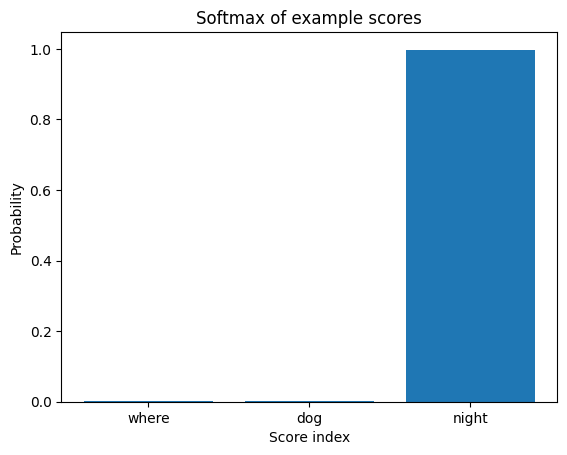

In [29]:
# Visualize softmax distribution
labels = ['where', 'dog', 'night']
plt.figure()
plt.bar(labels, probs)
plt.title('Softmax of example scores')
plt.ylabel('Probability')
plt.xlabel('Score index')
plt.show()


### 3 — Cross-Entropy Loss

For classification (one-hot labels), cross-entropy between true label `y` and predicted probabilities `p` is:
$$L = -\sum_i y_i \log p_i.$$ 

We'll compute cross-entropy for a toy true label and also show the gradient of loss w.r.t. logits for softmax+cross-entropy (the well-known simplification).

In [32]:
# Suppose true class is index 1 (dot2)
y_true = np.array([0, 0, 1])  # one-hot vector for "night"

p = probs

# cross-entropy
cross_entropy = -np.sum(y * np.log(p + 1e-12))

print("True label (y):", y_true)
print("Cross-entropy loss:", round(cross_entropy, 4))

True label (y): [0 0 1]
Cross-entropy loss: 6.5023


### Closing notes

These small examples mirror the internal math that powers how models like ChatGPT decide which words attend to which others.

In our case, the query word "sleep" learned to attend most strongly to "dog" and "night", just as a real transformer layer would.
